In [57]:
# import packages to process & wrangle data set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Upload data and assign a variable to the data frame
def load_data(file):                                                    
    return pd.read_csv(file, sep = ",", index_col = False, header=0)
Books=pd.read_excel("Top UK book sales of all time.xlsx")

In [3]:
print(Books)

      Rank                                              Title  \
0      1.0                                  Da Vinci Code,The   
1      2.0               Harry Potter and the Deathly Hallows   
2      3.0           Harry Potter and the Philosopher's Stone   
3      4.0          Harry Potter and the Order of the Phoenix   
4      5.0                               Fifty Shades of Grey   
..     ...                                                ...   
96    97.0                     Happy Days with the Naked Chef   
97    98.0              Hunger Games,The:Hunger Games Trilogy   
98    99.0  Lost Boy,The:A Foster Child's Search for the L...   
99   100.0  Jamie's Ministry of Food:Anyone Can Learn to C...   
100    NaN                                                NaN   

               Author  Volume Sales  Editions Combined  \
0          Brown, Dan       5094805                7.0   
1       Rowling, J.K.       4475152                8.0   
2       Rowling, J.K.       4200654          

In [4]:
#Look at the number of values in each column to see if there are missing values  
Books = Books.drop_duplicates(subset='Title', keep='first')
Books.count() 

Rank                 100
Title                100
Author               100
Volume Sales         101
Editions Combined    100
Imprint              100
Publisher            100
Publication Date     100
Genre                100
dtype: int64

In [5]:
Books.dtypes

Rank                        float64
Title                        object
Author                       object
Volume Sales                  int64
Editions Combined           float64
Imprint                      object
Publisher                    object
Publication Date     datetime64[ns]
Genre                        object
dtype: object

In [6]:
Books.describe()

,Rank,Volume Sales,Editions Combined
count,100.000000,1.010000e+02,100.000000
mean,50.500000,2.964895e+06,3.800000
std,29.011492,1.477706e+07,2.169578
min,1.000000,7.910950e+05,1.000000
25%,25.750000,9.456400e+05,2.000000
50%,50.500000,1.115549e+06,3.000000
75%,75.250000,1.783535e+06,5.000000
max,100.000000,1.497272e+08,11.000000


In [7]:
#dataset columns
list(Books)

['Rank',
 'Title',
 'Author',
 'Volume Sales',
 'Editions Combined',
 'Imprint',
 'Publisher',
 'Publication Date',
 'Genre']

In [8]:
#Creating a variable name for a column and listed out the genres
Genre=pd.value_counts(Books['Genre'])
print(Genre)

F1.1  General & Literary Fiction                   33
F2.1  Crime, Thriller & Adventure                  13
Y2.2  Young Adult Fiction                           9
Y2.1  Children's Fiction                            8
T16.0  Food & Drink: General                        6
Y1.3  Picture Books                                 4
T4.1A  Autobiography:  The Arts                     4
F2.5  Romance & Sagas                               3
T4.0A  Autobiography: General                       3
T9.4  Fitness & Diet                                3
T8.0  Popular Science                               2
F2.2  Science Fiction & Fantasy                     2
T8.5  Travel Writing                                2
T7.5  Current Affairs & Issues                      1
Y3.1  Children's Annuals                            1
T16.1  National & Regional Cuisine                  1
T4.1  Biography: The Arts                           1
T8.7  Popular Culture & Media: General Interest     1
T2.1  Usage & Writing Guides

In [9]:
list(Genre)

[33, 13, 9, 8, 6, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]

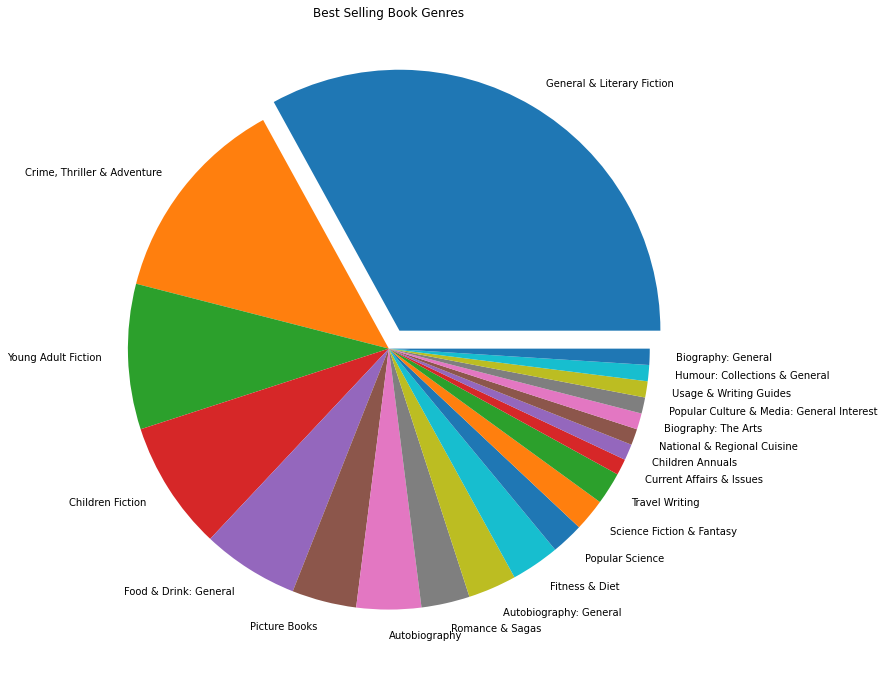

In [10]:
y = np.array([33, 13, 9, 8, 6, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1])
fig, ax= plt.subplots(figsize=(12,12))
mylabels=['General & Literary Fiction', 'Crime, Thriller & Adventure',
'Young Adult Fiction','Children Fiction','Food & Drink: General',
'Picture Books','Autobiography','Romance & Sagas','Autobiography: General',
'Fitness & Diet','Popular Science','Science Fiction & Fantasy','Travel Writing',                               
'Current Affairs & Issues','Children Annuals','National & Regional Cuisine',
'Biography: The Arts','Popular Culture & Media: General Interest',
'Usage & Writing Guides','Humour: Collections & General','Biography: General']
myexplode = [.08, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.title("Best Selling Book Genres")
plt.pie(y, labels = mylabels, explode = myexplode)  
plt.show()

Findings: 'General & Literacy Fiction' are the most popular

----------------------------------------------------------

Looking at the quantity of bestselling books by author

In [11]:
#Delete row with 0.0 as author and sum of volume sales because it is not useful for this model
Books = Books.drop(Books.index[-1])
Books = Books.drop(Books.index[[90]])

In [12]:
Author=(Books['Author'])
Author = list(set(Author))
print(Author)

['Lee, Harper', 'Haddon, Mark', "O'Grady, Paul", 'Meyer, Stephenie', 'Donaldson, Julia', 'Picoult, Jodi', 'Harris, Thomas', 'Lewycka, Marina', 'Tolkien, J. R. R.', 'Ahern, Cecelia', 'French, Dawn', 'James, E. L.', 'Nicholls, David', 'Ali, Monica', 'Harris, Robert', 'McCourt, Frank', 'Osbourne, Sharon', 'Grisham, John', 'Harris, Joanne', 'Sebold, Alice', 'Hornby, Nick', 'Brown, Dan', 'Bernieres, Louis de', 'Levy, Andrea', 'Rubenfeld, Jed', 'Binchy, Maeve', 'Hosseini, Khaled', 'McKeith, Gillian', 'Smith, Delia', 'Gray, John', 'Niffenegger, Audrey', 'Hislop, Victoria', 'Dawkins, Richard', 'Parsons, Tony', 'Pullman, Philip', 'Mosse, Kate', 'Golden, Arthur', 'Coelho, Paulo', 'Faulks, Sebastian', 'Zafon, Carlos Ruiz', 'Larsson, Stieg', 'McKenna, Paul', 'Martel, Yann', 'Kay, Peter', 'McCall Smith, Alexander', 'Smith, Zadie', 'Oliver, Jamie', 'Bryson, Bill', 'Morton, Kate', 'Collins, Suzanne', 'Lawson, Nigella', 'Stockett, Kathryn', 'Truss, Lynne', 'Fielding, Helen', 'Clarkson, Jeremy', 'McEwa

In [13]:
list(Author)

['Lee, Harper',
 'Haddon, Mark',
 "O'Grady, Paul",
 'Meyer, Stephenie',
 'Donaldson, Julia',
 'Picoult, Jodi',
 'Harris, Thomas',
 'Lewycka, Marina',
 'Tolkien, J. R. R.',
 'Ahern, Cecelia',
 'French, Dawn',
 'James, E. L.',
 'Nicholls, David',
 'Ali, Monica',
 'Harris, Robert',
 'McCourt, Frank',
 'Osbourne, Sharon',
 'Grisham, John',
 'Harris, Joanne',
 'Sebold, Alice',
 'Hornby, Nick',
 'Brown, Dan',
 'Bernieres, Louis de',
 'Levy, Andrea',
 'Rubenfeld, Jed',
 'Binchy, Maeve',
 'Hosseini, Khaled',
 'McKeith, Gillian',
 'Smith, Delia',
 'Gray, John',
 'Niffenegger, Audrey',
 'Hislop, Victoria',
 'Dawkins, Richard',
 'Parsons, Tony',
 'Pullman, Philip',
 'Mosse, Kate',
 'Golden, Arthur',
 'Coelho, Paulo',
 'Faulks, Sebastian',
 'Zafon, Carlos Ruiz',
 'Larsson, Stieg',
 'McKenna, Paul',
 'Martel, Yann',
 'Kay, Peter',
 'McCall Smith, Alexander',
 'Smith, Zadie',
 'Oliver, Jamie',
 'Bryson, Bill',
 'Morton, Kate',
 'Collins, Suzanne',
 'Lawson, Nigella',
 'Stockett, Kathryn',
 'Truss, L

In [14]:
print(Author)

['Lee, Harper', 'Haddon, Mark', "O'Grady, Paul", 'Meyer, Stephenie', 'Donaldson, Julia', 'Picoult, Jodi', 'Harris, Thomas', 'Lewycka, Marina', 'Tolkien, J. R. R.', 'Ahern, Cecelia', 'French, Dawn', 'James, E. L.', 'Nicholls, David', 'Ali, Monica', 'Harris, Robert', 'McCourt, Frank', 'Osbourne, Sharon', 'Grisham, John', 'Harris, Joanne', 'Sebold, Alice', 'Hornby, Nick', 'Brown, Dan', 'Bernieres, Louis de', 'Levy, Andrea', 'Rubenfeld, Jed', 'Binchy, Maeve', 'Hosseini, Khaled', 'McKeith, Gillian', 'Smith, Delia', 'Gray, John', 'Niffenegger, Audrey', 'Hislop, Victoria', 'Dawkins, Richard', 'Parsons, Tony', 'Pullman, Philip', 'Mosse, Kate', 'Golden, Arthur', 'Coelho, Paulo', 'Faulks, Sebastian', 'Zafon, Carlos Ruiz', 'Larsson, Stieg', 'McKenna, Paul', 'Martel, Yann', 'Kay, Peter', 'McCall Smith, Alexander', 'Smith, Zadie', 'Oliver, Jamie', 'Bryson, Bill', 'Morton, Kate', 'Collins, Suzanne', 'Lawson, Nigella', 'Stockett, Kathryn', 'Truss, Lynne', 'Fielding, Helen', 'Clarkson, Jeremy', 'McEwa

In [15]:
Author_count=pd.value_counts(Books['Author'])
print(Author_count)

Rowling, J.K.        9
Brown, Dan           5
Oliver, Jamie        5
Meyer, Stephenie     4
Pullman, Philip      3
                    ..
Ahern, Cecelia       1
McKeith, Gillian     1
Atkins, Robert C.    1
Truss, Lynne         1
Collins, Suzanne     1
Name: Author, Length: 66, dtype: int64


In [16]:
list(Author_count)

[9,
 5,
 5,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

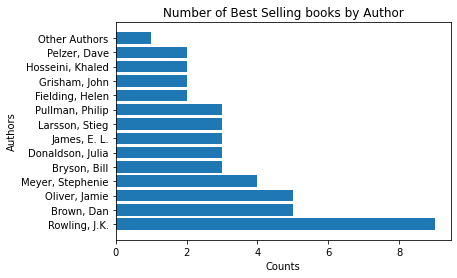

In [32]:
import matplotlib.pyplot as plt

Count= [9,5,5,4,3,3,3,3,3,2,2,2,2,1]
bestsellers = ['Rowling, J.K.','Brown, Dan','Oliver, Jamie','Meyer, Stephenie',
             'Bryson, Bill','Donaldson, Julia','James, E. L.','Larsson, Stieg',
             'Pullman, Philip','Fielding, Helen','Grisham, John',
             'Hosseini, Khaled','Pelzer, Dave','Other Authors']

plt.barh(bestsellers,Count)
plt.title('Number of Best Selling books by Author')
plt.ylabel('Authors')
plt.xlabel ('Counts')
plt.show()

In [33]:
Publisher_Column=pd.value_counts(Books['Publisher'])
print(Publisher_Column)

Random House Grp                  19
Transworld Grp                    14
Penguin Grp                       14
Bloomsbury Grp                    11
Pan Macmillan Grp                  7
HarperCollins Grp                  7
Little, Brown Book Grp             6
Orion Grp                          5
Scholastic Ltd. Grp                4
Quercus Grp                        3
Hodder & Stoughton Grp             3
Headline Grp                       3
Canongate Grp                      1
Profile Books Group                1
Random House Childrens Books G     1
Name: Publisher, dtype: int64


In [36]:
list(Publisher_Column)

[19, 14, 14, 11, 7, 7, 6, 5, 4, 3, 3, 3, 1, 1, 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


Text(0, 0.5, 'Count')

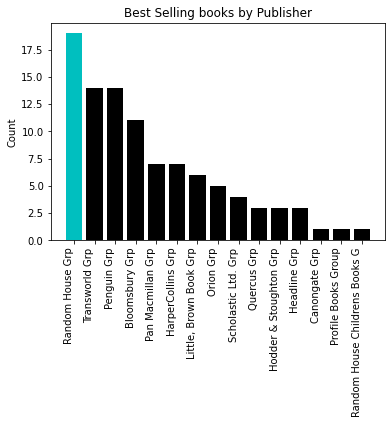

In [56]:
#Here we are formatting a bar graph with the values and making the graph look more presentable
Publisher_Column = ['Random House Grp','Transworld Grp','Penguin Grp','Bloomsbury Grp',
                    'Pan Macmillan Grp','HarperCollins Grp','Little, Brown Book Grp',
                    'Orion Grp','Scholastic Ltd. Grp','Quercus Grp','Hodder & Stoughton Grp',
                    'Headline Grp','Canongate Grp','Profile Books Group',
                    'Random House Childrens Books G'] 
Count= [19, 14, 14, 11, 7, 7, 6, 5, 4, 3, 3, 3, 1, 1, 1]
plt.bar(Publisher_Column, Count,color='ckkkkkkkkkkkkkk')  
#ha is short for horizontal alignment
plt.xticks(rotation=90, ha='right')
plt.title('Best Selling books by Publisher')
plt.ylabel('Count')

Findings: Here you can see that most of the best selling books from the dataset have been published through the 'Random house Grp'. As a new author, it could be helpful to have a book published here because they have a history of creating favored products.